In [2]:
import pandas as pd
import gensim.downloader as api
import spacy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [3]:
wv = api.load("word2vec-google-news-300")

In [4]:
df = pd.read_csv("fake_and_real_news.csv")

In [5]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [6]:
df["label_num"] = df.label.map(
    {'Fake':0,
    'Real':1}
)

In [7]:
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [8]:
nlp = spacy.load("en_core_web_sm")

In [9]:
def preprocess_and_vectorize(text):
    doc = nlp(text)

    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return wv.get_mean_vector(filtered_tokens)

In [10]:
df['Text_vector'] = df.Text.apply(lambda text: preprocess_and_vectorize(text))

In [11]:
df.head()

,Text,label,label_num,Text_vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[0.00858699, 0.019727645, -0.01165037, 0.03373..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[0.00995244, 0.007760858, 0.0022168206, 0.0172..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[0.018229874, 0.0063075763, -0.0059792665, 0.0..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[0.012800121, 0.012192702, -0.00054181775, 0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.001137371, 0.011028467, 0.003499095, 0.029..."


In [12]:
X_train,X_test,y_train,y_test = train_test_split(df.Text_vector.values,df.label_num,test_size = 0.2,random_state = 2022)

In [13]:
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (7920,)
X_test : (1981,)
y_train : (7920,)
y_test : (1981,)


In [14]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [15]:
model = GradientBoostingClassifier()
model.fit(X_train_2d,y_train)
y_pred = model.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1017
           1       0.98      0.98      0.98       964

    accuracy                           0.98      1981
   macro avg       0.98      0.98      0.98      1981
weighted avg       0.98      0.98      0.98      1981



Text(95.72222222222221, 0.5, 'Truth')

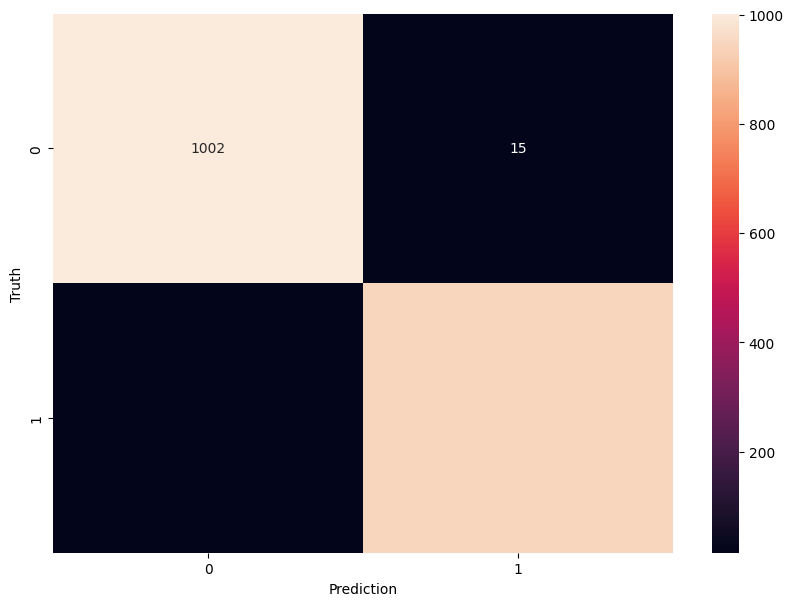

In [16]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [17]:
def predict_news_category(text, preprocess_and_vectorize, model):
    # Preprocess and vectorize the text
    processed_text = preprocess_and_vectorize(text)
    
    # Perform prediction
    prediction = model.predict([processed_text])[0]
    
    # Convert prediction to human-readable format
    category = "Fake" if prediction == 0 else "Real"
    
    return category

In [18]:
news = "Prime Minister Narendra Modi files nomination for Varanasi Lok Sabha seat with diverse support from astrology scholar Ganeshwar Shastri Dravid, Lalchand Kushwaha representing OBC segment, Sanjay Sonkar from Dalit community, and Baijnath Patel, reflecting broad social group backing."
result = predict_news_category(news,preprocess_and_vectorize, model)
print("The news is :", result)

The news is : Real


In [19]:
# import joblib
from joblib import dump

# dump the pipeline model
dump(model, filename="news_classification.joblib")

['news_classification.joblib']